### CIR Model to simulate changes in Interest Rates and Liability Hedging
The Cox Ingersoll Ross model is used to model the dynamics of interest rates, and is an extension of the popular Vasicek Model to prevent negative interest rates:

$$ dr_{t} = a (b-r_{t})\,dt + \sigma {\sqrt {r_{t}}}\,dW_{t} $$

Short Rate vs Annualized


In [29]:
1 + 1 * 1

2

In [30]:
1 + 1 * 0.5 + (1 + 1 * 0.5) * 0.5


2.25

In [31]:
1 + (1) * .25 + (1 + (1) * .25) * 0.25 + (1 + (1) * .25 + (1 + (1) * .25) * 0.25) * .25 + \
    (1 + (1) * .25 + (1 + (1) * .25) * 0.25 +
     (1 + (1) * .25 + (1 + (1) * .25) * 0.25) * .25) * .25


2.44140625

In general, if we compund every 1/N of a year (i.e. N times a year) we get:
$$\left(1+\frac{r}{N}\right)^N$$

In [32]:
# twice a year
(1 + 1 / 2) ** 2

2.25

In [33]:
# four times per year
(1 + 1 / 4) ** 4

2.44140625

In [34]:
# twelve times per year
(1 + 1 / 12) ** 12

2.613035290224676

In [35]:
# 365 times per year
(1 + 1 / 365) ** 365

2.7145674820219727

As N becomes very large we get the generalization:

$$ 1 + r_{annual} = e ^ {r_{inst}} $$

i.e.

$$ r_{annual} = e ^ {r_{inst}} - 1 $$

and 

$$ r_{inst} = ln(1 + r_{annual}) $$

In [36]:
import numpy as np
import pandas as pd
import risk_tools as rt

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$$ dr_{t} = a(b-r_{t})\, dt + \sigma {\sqrt {r_{t}}}\, dW_{t} $$


In [37]:
%matplotlib inline

interactive(children=(FloatSlider(value=0.03, description='r_0', max=0.15, step=0.01), FloatSlider(value=0.5, …

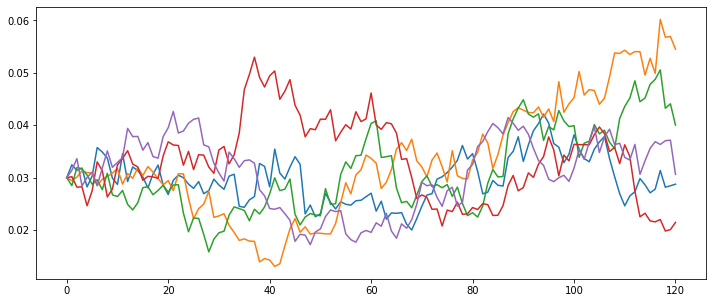

In [42]:
def show_cir(r_0=0.03, a=0.5, b=0.03, sigma=0.05, n_scenarios=5):
   rt.cir(r_0=r_0, a=a, b=b, sigma=sigma, n_scenarios=n_scenarios).plot(legend=False, figsize=(12, 5))

import ipywidgets as widgets
from IPython.display import display

controls = widgets.interactive(
    show_cir,
    r_0 = (0, .15, .01),
    a = (0, 1, .1),
    b = (0, .15, .01),
    sigma = (0, .1, .01),
    n_scenarios = (1, 100))

display(controls)